In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
[l, h] = [57, 80]
heights_pop = np.random.rand(1000) * (h-l) + l

## What does the population look like?

num = 1000
pop. mean = 68.406195


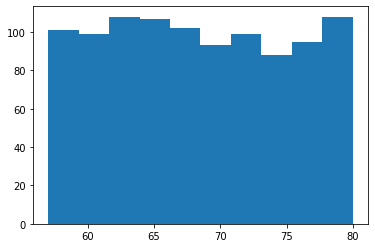

In [2]:
plt.hist(heights_pop)
print('num = %d' % len(heights_pop))
print('pop. mean = %f' % np.mean(heights_pop))

## Function to sample from the population

67.43157784296102


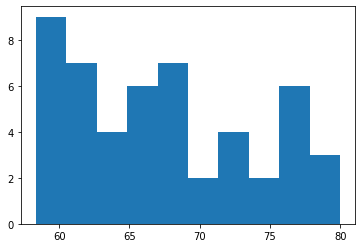

In [3]:
def get_sample(sample_size):
    return np.random.choice(heights_pop, size=sample_size)
sample = get_sample(50)
plt.hist(sample)
print(np.mean(sample))

In [4]:
# Let's sample 50 samples 10 times and compute xbar each time
for i in range(10):
    x_bar = np.mean(get_sample(50))
    print(x_bar)

66.86283260046085
69.00911119776286
68.31883579798986
69.15834016258508
68.71629432728038
65.88734995542724
68.29635801900214
69.0662803320783
69.76104166212019
67.99856241695707


In [5]:
# Let's put in a list using a list comprehension
x_bar_list = [np.mean(get_sample(50)) for i in range(10)]
print(x_bar_list)

[68.34243302901608, 68.84638278534169, 68.45573286994664, 70.23529577667469, 68.01479838483341, 68.13080608910067, 70.07658352681901, 67.23972779433147, 68.01507829414726, 67.75870307758584]


## Function to repeat the experiment

In [6]:
def repeat_experiment(n_repeats=10, n_samples=50):
    return [np.mean(get_sample(n_samples)) 
            for i in range(n_repeats)]
repeat_experiment()

[68.72973497472702,
 67.85903102813499,
 67.9827025209443,
 68.12709213076994,
 68.11063045635566,
 67.9841320418931,
 68.553594322684,
 67.6553032543313,
 67.92745312365558,
 69.04026924188064]

In [7]:
# Let's calculate how close these estimates are to the population mean
mu_pop = np.mean(heights_pop)
x_bar_list = repeat_experiment(n_repeats=10, n_samples=50)
mse = np.mean((x_bar_list - mu_pop)**2)
print(mse)

0.6057557665959479


In [8]:
# What if we use a smaller number of samples?
mu_pop = np.mean(heights_pop)
x_bar_list = repeat_experiment(n_repeats=10, n_samples=10)
mse = np.mean((x_bar_list - mu_pop)**2)
print(mse)

8.089564954989061


## Visualizing the Central Limit Theorem

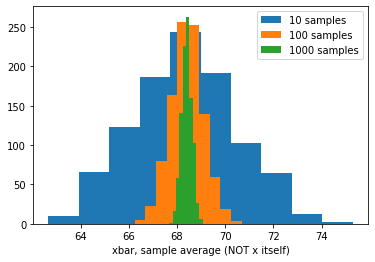

In [9]:
# What if we plot the distribution of repeating this experiment?
x_bar_list = repeat_experiment(n_repeats=1000, n_samples=10)
_ = plt.hist(x_bar_list, label='10 samples')

x_bar_list = repeat_experiment(n_repeats=1000, n_samples=100)
_ = plt.hist(x_bar_list, label='100 samples')

x_bar_list = repeat_experiment(n_repeats=1000, n_samples=1000)
_ = plt.hist(x_bar_list, label='1000 samples')
plt.xlabel('xbar, sample average (NOT x itself)')
plt.legend()

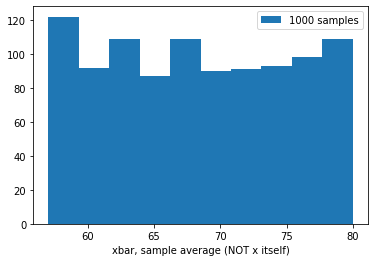

In [10]:
# What if we only have one sample per experiment?
x_bar_list = repeat_experiment(n_repeats=1000, n_samples=1)
_ = plt.hist(x_bar_list, label='1000 samples')
plt.xlabel('xbar, sample average (NOT x itself)')
plt.legend()

In [11]:
# Notice that even though the original distribution is not normal,
# the distribution of x_bar (the sample mean) is almost normal,
# provided that we have a large enough n_samples.